#**Data set "kc_house"**

El conjunto de datos "kc_house" corresponden a los precios de la venta de viviendas en el condado de King, Washington (USA) y algunas de sus características, comprendido entre el periodo de Mayo/2014 y Mayo/2015.

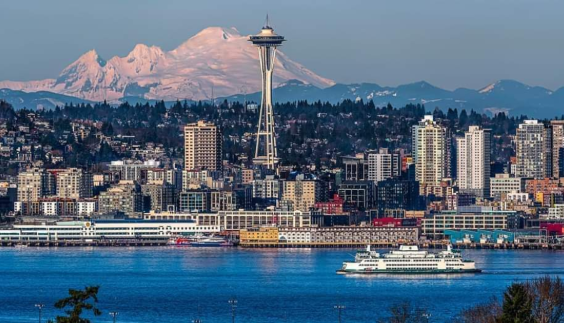

_Foto de Seatle, ciudad sede del condado._

## Metadatos

A continuación se encuentra una explicación general de cada una de las variables, que componen el conjunto de datos a analizar:

- id : ID único para cada casa vendida
- date : Fecha de venta de la vivienda
- price : Precio de cada vivienda vendida
- bedrooms: Número de dormitorios
- bathrooms: Número de baños, donde 0.5 representa una habitación con inodoro pero sin ducha
- sqft_living : Pies cuadrados del espacio habitable interior de los apartamentos
- sqft_lot : Pies cuadrados del terreno
- floors : Número de pisos
- waterfront : una variable ficticia que indica si el apartamento tenía vista al frente del mar o no
- view : un índice de 0 a 4 de qué tan buena era la vista de la propiedad
- condition : Un índice del 1 al 5 sobre el estado del apartamento
- grade : un índice del 1 al 13, donde del 1 al 3 no alcanza la construcción y el diseño de edificios, el 7 tiene un nivel promedio de construcción y diseño y el 11 al 13 tiene un nivel alto de calidad de construcción y diseño
- sqft_above: los pies cuadrados del espacio interior de la vivienda que está sobre el nivel del suelo
- sqft_basement: los pies cuadrados del espacio interior de la vivienda que está debajo del nivel del suelo.
- yr_built: el año en que se construyó inicialmente la casa.
- yr_renovated: el año de la última renovación de la casa.
- zipcode: en qué área del código postal se encuentra la casa
- lat : latitud
- long : Longitud
- sqft_living15: los pies cuadrados del espacio habitable interior de la vivienda para los 15 vecinos más cercanos
- sqft_lot15 : Los pies cuadrados de los lotes de tierra de los 15 vecinos más cercanos



## Análisis descriptivo

In [ ]:
#Cargue de librerias para análisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from google.colab import data_table
data_table.disable_dataframe_formatter()
# !pip install matplotlib --upgrade
import seaborn as sns
#Libreria para analisis de regresion lineal
from sklearn.linear_model import LinearRegression

In [ ]:
#Libreria para acceso a Drive (Dataset)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Cargue del conjunto de datos
khouse = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PLE_Trabajo/kc_house_data.csv', parse_dates= ['date'])
print(f'La cantidad de registros que contiene el dataset es de {khouse.shape[0]} y {khouse.shape[1]} variables')

La cantidad de registros que contiene el dataset es de 21613 y 21 variables


In [ ]:
#Primeros 5 registros de la base de datos
khouse.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#Validación de variables y su tipo
khouse.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21611 non-null  float64       
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

Mayoritariamente las variables de la base de datos son de tipo "Numerico" a excepción de la variable "date" que es de tipo "Texto" y/o una mezcla de datos numericos y texto.

###Valores nulos o faltantes

In [ ]:
#Validación de la cantidad de valores nulos o ausentes
khouse.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

La unica variable que contiene datos nulos es "sqft_above" con 2 valores. Teniendo en la cantidad de datos nulos, se eliminan los registros correspondientes

In [ ]:
#Eliminacion de registros con valores nulos
khouse.dropna(inplace = True)

###Principales datos descriptivos de las variables

In [ ]:
#Principales descrptivios
khouse.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161100e+04,21611,2.161100e+04,21611.000000,21611.000000,21611.000000,2.161100e+04,21611.000000,21611.000000,21611.000000,...,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000,21611.000000
mean,4.580327e+09,2014-10-29 04:37:51.509879040,5.400850e+05,3.370830,2.114791,2079.853454,1.510771e+04,1.494332,0.007542,0.234325,...,7.656888,1788.396095,291.457360,1971.007959,84.410069,98077.941928,47.560046,-122.213894,1986.559576,12769.025357
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.217250e+05,3.000000,1.750000,1426.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470950,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068850e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.500000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876592e+09,NaN,3.671430e+05,0.930092,0.770157,918.422406,4.142235e+04,0.540003,0.086521,0.766350,...,1.175502,828.128162,442.487355,29.372358,401.697007,53.505054,0.138568,0.140831,685.416548,27305.369808


  A continuación realizaremos un análisis específico de algunas de las variables que a consideración podrian ser relevantes para entender las características de las viviendas registradas como vendidas.

  A través de las medidas descriptivas de cada una de las variables del Dataset, se pueden identificar los siguientes hallazgos:
-	El 75% de las viviendas para la variable Price o precio, tiene un valor inferior o igual a USD 645.000
-	Los valores mínimos para las variables sqft_living o pies cuadrados habitables y sqft_lot o pies cuadrados del terreno corresponden a 290 ft2 y 5.200 ft2.
-	El 75% de las viviendas tienen dos o menos niveles y/o plantas.
-	El 75% de las viviendas no cuenta con vistas al mar y/o no tiene un buen nivel de visión en la propiedad.
-	El 25% de las viviendas fueron construidas entre 1997 y 2015.


## Analisis de las variables

### **Price** : Precio

Text(0, 0.5, 'Cantidad de viviendas')

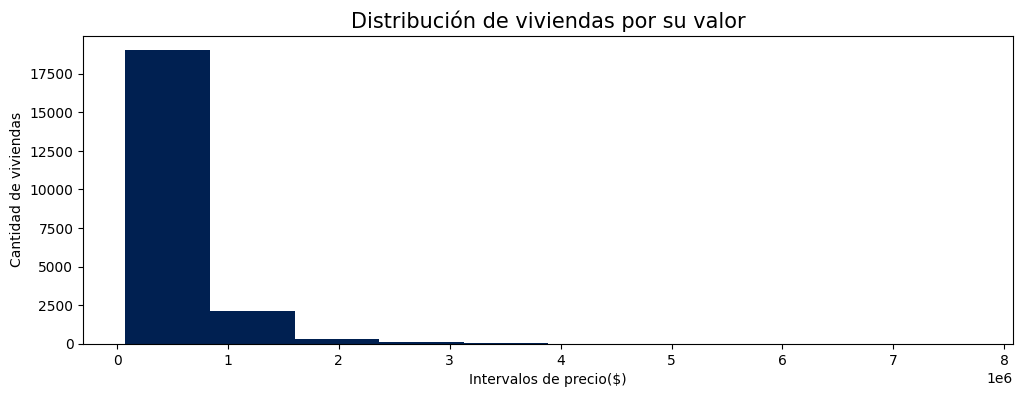

In [ ]:
#Histograma de precio
fig, ax= plt.subplots(figsize=(12,4))
ax.hist(khouse['price'], color = '#002051')
ax.set_title('Distribución de viviendas por su valor',fontsize=15)
ax.set_xlabel('Intervalos de precio($)')
ax.set_ylabel('Cantidad de viviendas')

En este histograma se puede observar que mas de 17500 viviendas tienen un valor inferior a un millón de dólares.

El valor promedio de las viviendas en el condado de King entre mayo del año 2015 y mayo del año 2016 es 540085.03 dolares


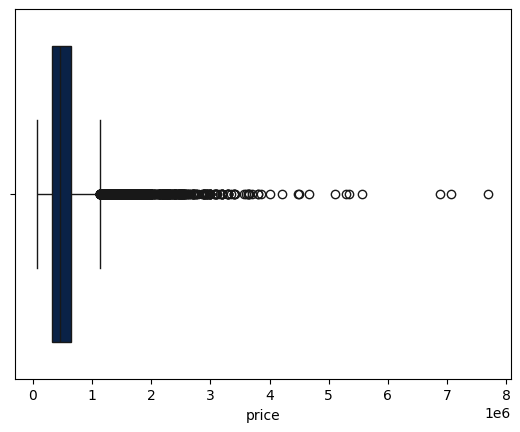

In [ ]:
#Grafico boxplot distribución precios de viviendas
sns.boxplot(x='price',data=khouse, color = '#002051')
precio_medio=khouse['price'].mean()
print(f'El valor promedio de las viviendas en el condado de King entre mayo del año 2015 y mayo del año 2016 es {precio_medio:.2f} dolares')

El valor promedio de las viviendas en el condado de King entre mayo del año 2015 y mayo del año 2016 es 540085 dolares aproximadamente.

El valor promedio de las viviendas en el condado de King entre mayo del año 2015 y mayo del año 2016 es 540.085,03 USD. Los precios se distribuyen de la siguiente manera:
-	20.146 viviendas con un precio entre 75.000-1M USD, equivalente al 93% aproximadamente.
-	1.267 viviendas con un precio entre 1M – 2M USD, equivalente al 5% aproximadamente.
-	198 viviendas con un precio entre 2M – 8M, equivalente a menos del 2% aproximadamente.

Se visualizan algunas valores atípicos de los precios de la vivienda en el intervalo entre 1M y 8M USD.


In [ ]:
#Asignación de grupos por precios
grupos_precios= [0, 1000000, 2000000, 5000000, 8000000]
estados_pre = ['1M USD o menos de dolares','Entre 1M USD y 2M USD','Entre 2M USD y 5M USD', 'Más de 5M USD']
#Copia de Dataframe original
khouse1 = khouse.copy()
khouse1['grupos por precio'] = pd.cut(khouse1['price'],bins=grupos_precios,labels=estados_pre, include_lowest = True, duplicates = 'drop')

#Tabla de frecuencias por grupos de habitaciones
precio = pd.DataFrame(khouse1['grupos por precio'].value_counts())
precio.rename(columns={'count': 'Frecuencia'}, inplace=True)
precio['Frecuencia Rel.%'] = (precio['Frecuencia']/len(khouse))
precio

,Frecuencia,Frecuencia Rel.%
grupos por precio,,
1M USD o menos de dolares,20146,0.932210
Entre 1M USD y 2M USD,1267,0.058628
Entre 2M USD y 5M USD,191,0.008838
Más de 5M USD,7,0.000324


### **Date** : Fecha de venta

Las fechas que componen esta variable, estan comprendidas entre Mayo de 2014 y Mayo de 2015 (1 año)

In [ ]:
#Conversión de variable a objeto de fecha
khouse1['date'] = pd.to_datetime(khouse['date'])

#Creación de variable "mes-año" para visualizar comportamiento de ventas

khouse1['Month-Year'] = khouse1['date'].dt.strftime('%m/%y')

#Tabla de frecuencias- Ventas por mes
ventas_mes = pd.DataFrame(khouse1['Month-Year'].value_counts())
ventas_mes .rename(columns={'count': 'Frecuencia'}, inplace=True)
ventas_mes

,Frecuencia
Month-Year,
04/15,2230
07/14,2211
06/14,2180
08/14,1940
10/14,1878
03/15,1875
09/14,1774
05/14,1767
12/14,1471


Text(0.5, 1.0, 'Ventas realizadas entre Mayo-2014 y Mayo-2015')

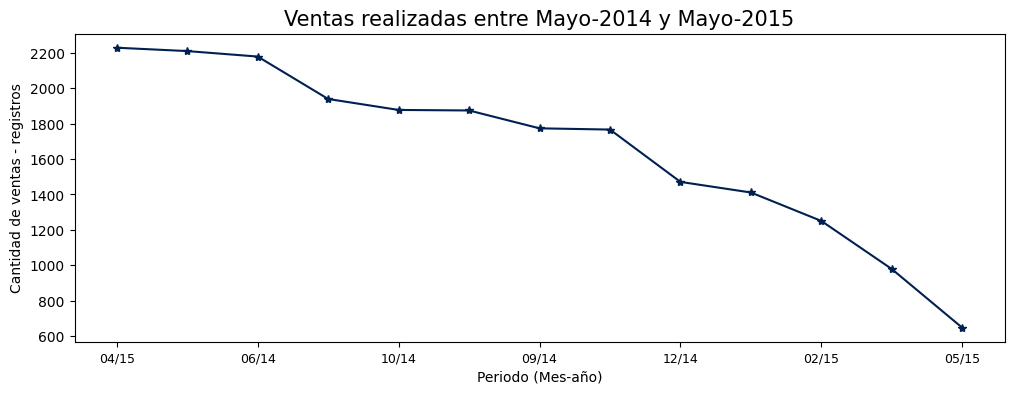

In [ ]:
#Grafico de linea mes-año venta
fig, ax = plt.subplots(figsize = (12, 4))
ax = khouse1['Month-Year'].value_counts().plot(kind='line',color='#002051', marker = '*')
plt.xlabel('Periodo (Mes-año)')
plt.ylabel('Cantidad de ventas - registros')
plt.xticks(rotation=0)
plt.xticks(fontsize=9)
plt.title("Ventas realizadas entre Mayo-2014 y Mayo-2015",fontsize=15)

Para el periodo de análisis, con relación a la variable "date" o **Fecha de venta** se puede visualizar que la mayor cantidad de registros  de venta fue realiza en Abril de 2015 con 2.230 ventas y Junio y Julio del año 2014 con 2.180 y 2.211 respectivamente. Las menores ventas registradas se realizaron en Enero y Mayo del año 2015, con 978 y 646 ventas respectivamente.

Realizando una comparativa entre el mes de Mayo del año 2015 y el mes de Mayo de 2014 se puede apreciar una _significativa baja_ en la cantidad de ventas registrada de un 63.5% aprox.

### **bedrooms**: Habitaciones

In [ ]:
#Asignación grupos por cantidad de habitaciones
grupos_habt = [0, 3, 6, 33]
estados_habt = ['Tres o menos habitaciones','Entre tres y seis habitaciones','Mas de 6 habitaciones']
khouse1['habitaciones por vivienda'] = pd.cut(khouse1['bedrooms'],bins=grupos_habt,labels=estados_habt, include_lowest = True, duplicates = 'drop')

#Tabla de frecuencias por grupos de habitaciones
habi = pd.DataFrame(khouse1['habitaciones por vivienda'].value_counts())
habi.rename(columns={'count': 'Frecuencia'}, inplace=True)
habi['Frecuencia Rel.%'] = (habi['Frecuencia']/len(khouse))
habi

,Frecuencia,Frecuencia Rel.%
habitaciones por vivienda,,
Tres o menos habitaciones,12795,0.592060
Entre tres y seis habitaciones,8754,0.405071
Mas de 6 habitaciones,62,0.002869


En relación a la variable "bedrooms" o **habitaciones**, que hace referencia a la cantidad de habitaciones, se identifica que el 59% _(12.795 residencias)_ aproximadamente de las viviendas registradas cuentan con tres o menos habitaciones, 40% _(8.754 residencias)_ aproximadamente cuentan con tres y seis habitacione  y menos del 1% _(62 residencias)_ aproximadamente con mas de seis habitaciones.

Se puede visualizar que existe cierta correlación **positiva** entre la cantidad de habitaciones y el precio de la vivienda.

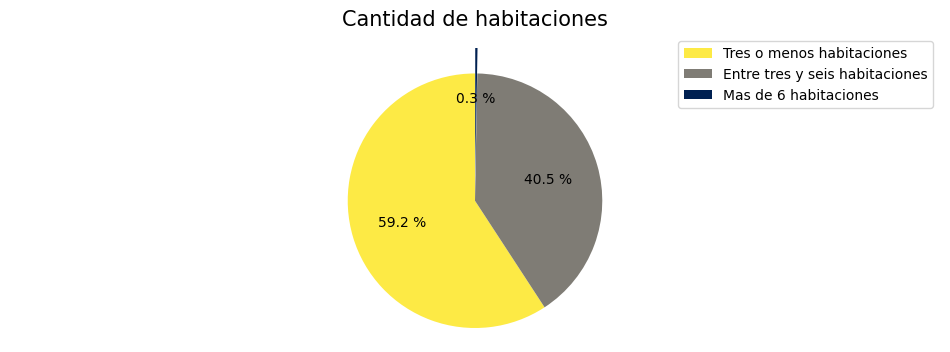

In [ ]:
#Grafico de pie por grupos de habitaciones
fig, ax = plt.subplots(figsize = (12, 4))
labels=khouse1['habitaciones por vivienda'].unique()
explode = (0, 0, 0.2)
ax.pie(khouse1['habitaciones por vivienda'].value_counts(), autopct="%0.1f %%", startangle=90, explode=explode,
       textprops={'color': 'Black','fontsize':10},
       colors=['#fdea45', '#7f7c75', '#002051'])
ax.axis("equal")
ax.set_title('Cantidad de habitaciones',fontsize = 15)
ax.legend(labels)

Text(0, 0.5, 'Cantidad de habitaciones')

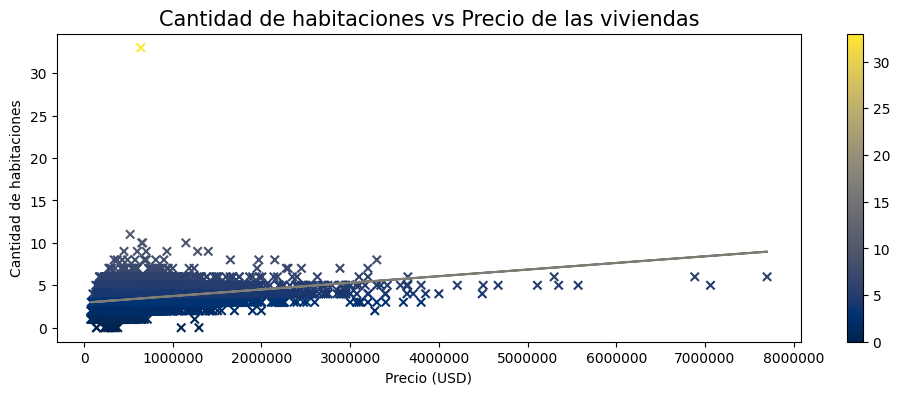

In [ ]:
#Linea de tendencia con ajuste lineal
z = np.polyfit(khouse['price'], khouse['bedrooms'], 1)
p = np.poly1d(z)

#Grafico de dispersión cantidad de baños - Precio
fig, ax = plt.subplots(figsize = (12,4))
mapeo = ax.scatter(khouse['price'],khouse['bedrooms'], c = khouse['bedrooms'], marker ="x",cmap = plt.cm.cividis)
ax.plot(khouse['price'], p(khouse['price']), color = '#7f7c75')
fig.colorbar(mapeo)
ax.ticklabel_format(style='plain')
ax.set_title('Cantidad de habitaciones vs Precio de las viviendas', fontsize = 15)
ax.set_xlabel('Precio (USD)')
ax.set_ylabel('Cantidad de habitaciones')

En lo referente a  la cantidad de habitaciones por la que se encuentran conformadas las viviendas y estudiar su relación con la variable precio, se observa una correlación positiva.

### **bathrooms**: Baños

In [ ]:
#Asignación grupos por cantidad de baños
grupos_baños = [0, 1, 2, 4, 9]
estados_baños = ['Un baño o menos','Entre uno y dos baños','Entre dos y cuatro baños','Mas de cuatro baños']
khouse1['baños por vivienda'] = pd.cut(khouse1.bathrooms,bins=grupos_baños,labels=estados_baños, ordered = False, include_lowest = True)

#Tabla de frecuencias por grupos de baños
baños = pd.DataFrame(khouse1['baños por vivienda'].value_counts())
baños.rename(columns={'count': 'Frecuencia'}, inplace=True)
baños['Frecuencia Rel.%'] = (baños['Frecuencia']/len(khouse))
baños

,Frecuencia,Frecuencia Rel.%
baños por vivienda,,
Entre dos y cuatro baños,10975,0.507843
Entre uno y dos baños,6433,0.297672
Un baño o menos,3937,0.182176
Mas de cuatro baños,266,0.012309


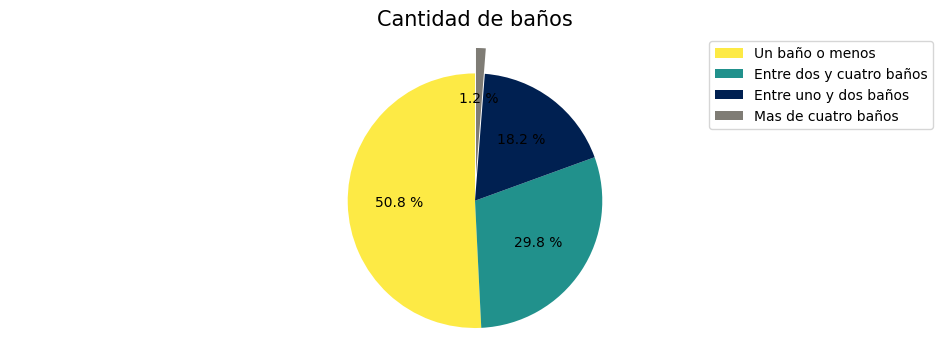

In [ ]:
#Grafico de pie por grupos de baños
fig, ax = plt.subplots(figsize = (12, 4))
labels=khouse1['baños por vivienda'].unique()
explode = (0, 0, 0, 0.2)
ax.pie(khouse1['baños por vivienda'].value_counts(), autopct="%0.1f %%", startangle=90, explode=explode,
       textprops={'color': 'Black','fontsize':10},
       colors=['#fdea45', '#21918c', '#002051', '#7f7c75'])
ax.axis("equal")
ax.set_title('Cantidad de baños',fontsize = 15)
ax.legend(labels)

En relación a la variable "bathroom" o **baños**, que hace referencia a la cantidad de baños, se identifica que el 51% aproximadamente de las viviendas registradas cuentan con dos o cuatro baños, 30% aproximadamente cuentan con entre uno y dos baños y 18% aproximadamente con un baño o menos. Es de anotar que para el conjunto de datos, 0.5 representa una habitación con bateria de baño pero sin ducha. Solo el 1% aproximadamente o 266 viviendas cuenta con mas de 4 baños.

Se puede visualizar que existe cierta correlación **positiva** entre la cantidad de baños y el precio de la vivienda.

Text(0, 0.5, 'Cantidad de baños')

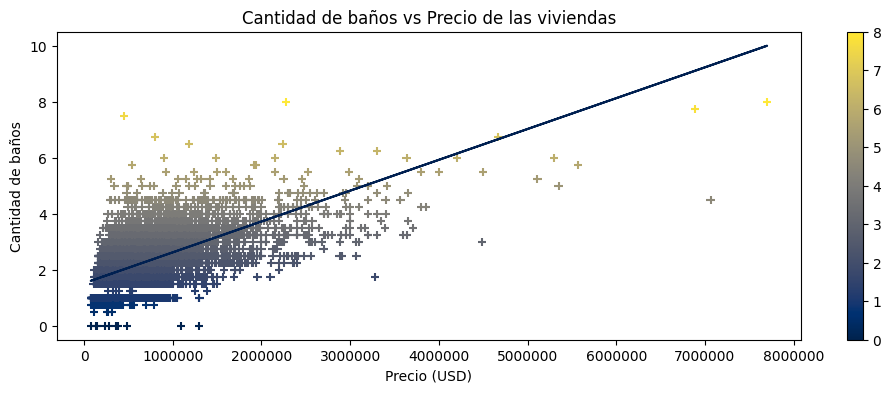

In [ ]:
#Linea de tendencia con ajuste lineal
z = np.polyfit(khouse['price'], khouse['bathrooms'], 1)
p = np.poly1d(z)

#Grafico de dispersión cantidad de baños - Precio
fig, ax = plt.subplots(figsize = (12,4))
mapeo = ax.scatter(khouse['price'],khouse['bathrooms'], c = khouse['bathrooms'], marker ="+", cmap = plt.cm.cividis)
ax.plot(khouse['price'], p(khouse['price']), color = '#002051')
fig.colorbar(mapeo)
ax.ticklabel_format(style='plain')
ax.set_title('Cantidad de baños vs Precio de las viviendas')
ax.set_xlabel('Precio (USD)')
ax.set_ylabel('Cantidad de baños')

### **sqft living**: Pies cuadrados habitables

Text(0, 0.5, 'Pies cuadrados (ft2)')

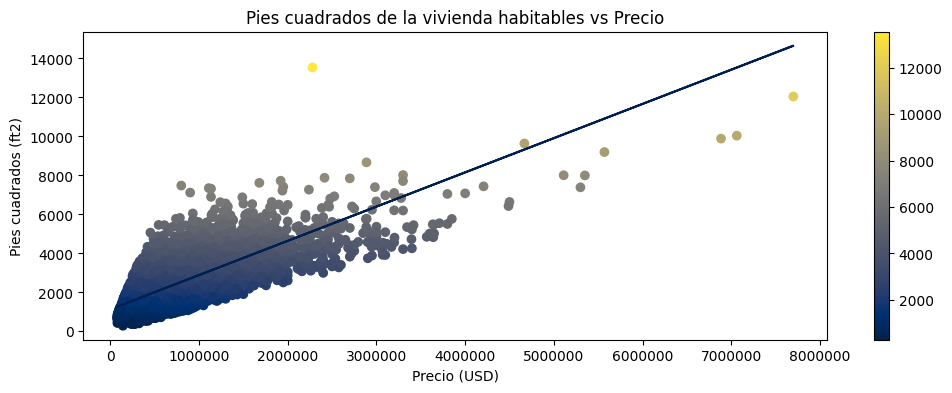

In [ ]:
#Linea de tendencia con ajuste lineal
z = np.polyfit(khouse['price'], khouse['sqft_living'], 1)
p = np.poly1d(z)

#Grafico de dispersion pies cuadrados habitables vs precio
fig, ax=plt.subplots(figsize = (12,4))
mapeo_colores=ax.scatter(khouse['price'],khouse ['sqft_living'], c=khouse['sqft_living'], cmap = plt.cm.cividis)
ax.plot(khouse['price'], p(khouse['price']), color ='#002051')
fig.colorbar(mapeo_colores)
ax.ticklabel_format(style='plain')
ax.set_title('Pies cuadrados de la vivienda habitables vs Precio')
ax.set_xlabel('Precio (USD)')
ax.set_ylabel('Pies cuadrados (ft2)')

Con relación a la variable sqft_living o Pies cuadrados del espacio habitable interior de los apartamentos se estudia la relación de esta y la de price o precio, observando una correlación positiva.

In [ ]:
#Asignación de grupos por pies cuadrados habitables
grupos_area_ha= [290, 3000, 6000, 9000, 13600]
estados_area_ha = ['Tres mil o menos ft2','Entre tres mil y seis mil ft2', 'Entre seis mil y nueve mil ft2','Más de nueve mil ft2']
khouse1['grupos_areas_habitables'] = pd.cut(khouse1['sqft_living'],bins=grupos_area_ha,labels=estados_area_ha, include_lowest = True, duplicates = 'drop')

#Tabla de frecuencias por grupos de habitaciones
area_habit = pd.DataFrame(khouse1['grupos_areas_habitables'].value_counts())
area_habit.rename(columns={'count': 'Frecuencia'}, inplace=True)
area_habit['Frecuencia Rel.%'] = (area_habit['Frecuencia']/len(khouse))
area_habit

,Frecuencia,Frecuencia Rel.%
grupos_areas_habitables,,
Tres mil o menos ft2,18530,0.857434
Entre tres mil y seis mil ft2,3013,0.139420
Entre seis mil y nueve mil ft2,62,0.002869
Más de nueve mil ft2,6,0.000278


En relación a la variable "sqft_living" que hace referencia a los Pies cuadrados del espacio habitable interior de los apartamentos, se identifica que el 85% aproximadamente de las viviendas registradas cuentan con un área de al menos tres mil ft2(pies cuadrados), 13% aproximadamente cuentan con un área de tres mil a seis mil ft2 y menos del 1% aproximadamente con mas de seis mil ft2.

### **sqft lot**: Pies cuadrados terreno

Text(0, 0.5, 'Pies cuadrados (ft2)')

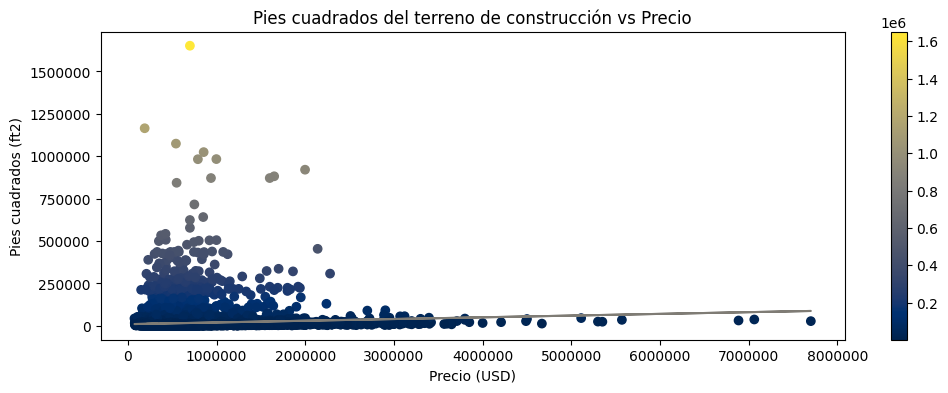

In [ ]:
#Linea de tendencia con ajuste lineal
z = np.polyfit(khouse['price'], khouse['sqft_lot'], 1)
p = np.poly1d(z)

#Grafico de dispersion pies cuadrados habitables vs precio
fig, ax=plt.subplots(figsize = (12,4))
mapeo_colores=ax.scatter(khouse['price'],khouse ['sqft_lot'], c=khouse['sqft_lot'], cmap = plt.cm.cividis)
ax.plot(khouse['price'], p(khouse['price']), color ='#7f7c75')
fig.colorbar(mapeo_colores)
ax.ticklabel_format(style='plain')
ax.set_title('Pies cuadrados del terreno de construcción vs Precio')
ax.set_xlabel('Precio (USD)')
ax.set_ylabel('Pies cuadrados (ft2)')

In [ ]:
#Asignación de grupos por pies cuadrados habitables
grupos_area_te= [0, 5000, 25000, 50000, 2000000]
estados_area_te = ['5k ft2 o menos', 'Entre 5K ft2 y 25K ft2', 'Entre 25K y 50K ft2','Más de 50K ft2']
khouse1['grupos_areas_terreno'] = pd.cut(khouse1['sqft_lot'],bins=grupos_area_te,labels=estados_area_te, include_lowest = True, duplicates = 'drop')

#Tabla de frecuencias por grupos de habitaciones
area_terre = pd.DataFrame(khouse1['grupos_areas_terreno'].value_counts())
area_terre.rename(columns={'count': 'Frecuencia'}, inplace=True)
area_terre['Frecuencia Rel.%'] = (area_terre ['Frecuencia']/len(khouse))
area_terre

,Frecuencia,Frecuencia Rel.%
grupos_areas_terreno,,
Entre 5K ft2 y 25K ft2,14424,0.667438
5k ft2 o menos,5289,0.244736
Entre 25K y 50K ft2,1016,0.047013
Más de 50K ft2,882,0.040813


### **floors**: Numero de pisos

Con relación a la variable “floors” o pisos, 10.679 viviendas (49% aproximadamente) tienen una planta o piso, 8.241 viviendas (38% aproximadamente) cuenta con dos pisos, 1.909 viviendas (8% aproximadamente) se caracterizan por tener 1.5 pisos y 2.691 viviendas (3% aproximadamente) cuenta con entre 2.5 pisos y 3.5 pisos

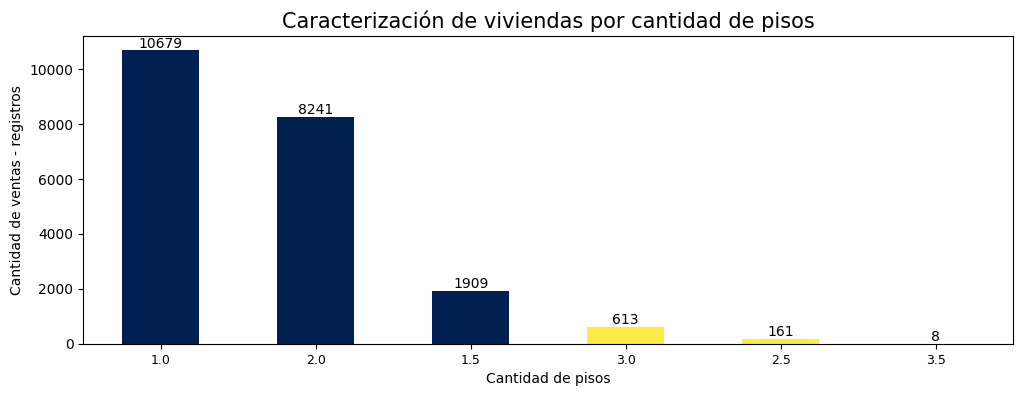

In [ ]:
#Grafico de barras distribucion de pisos
fig, ax = plt.subplots(figsize = (12, 4))
ax = khouse['floors'].value_counts().plot(kind='bar',color=['#002051','#002051','#002051','#fdea45','#fdea45','#fdea45'])
plt.xlabel('Cantidad de pisos')
plt.ylabel('Cantidad de ventas - registros')
plt.xticks(rotation=0)
plt.xticks(fontsize=9)
plt.title("Caracterización de viviendas por cantidad de pisos",fontsize=15)
for container in ax.containers:
    ax.bar_label(container);

### **condition**: Estado del apartamento

Respecto a la condición de las viviendas en donde, 1 es "Deficiente"  y 5 "Excelente" sobre el estado del apartamento, se concluye lo siguiente:

- 64.9% de las viviendas se encuentre en un estado "Aceptable" (Indice 3)
- 26.3 % de las viviendas se encuentran en un estado "Excelente" (Indice 5)
- 7.9% de las viviendas se encuentran en un estado "Sobresaliente" (Indice 4)
- 0.9% de las viviendas se encuentran en un estado "Deficiente" y "Regular" (Indice 1 y 2)

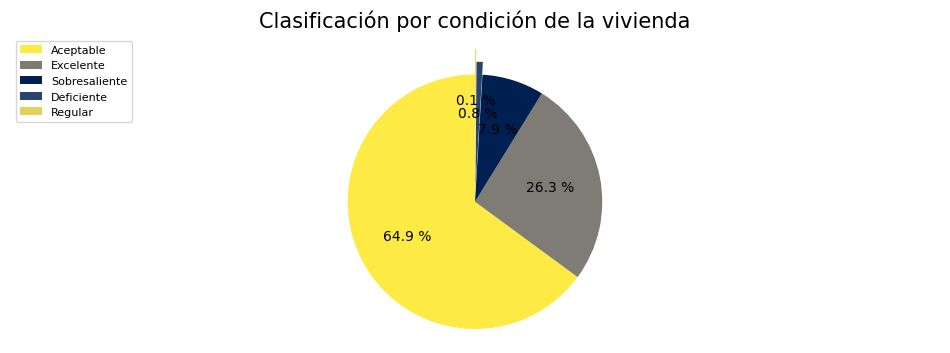

In [ ]:
#Grafico de pie por grupos de habitaciones
fig, ax = plt.subplots(figsize = (12, 4))
# labels=khouse['condition'].unique()
labels=['Aceptable', 'Excelente', 'Sobresaliente', 'Deficiente', 'Regular']
explode = (0, 0, 0, 0.1, 0.2)
ax.pie(khouse['condition'].value_counts(), autopct="%0.1f %%", startangle=90, explode=explode,
       textprops={'color': 'Black','fontsize':10},
       colors=['#fdea45', '#7f7c75', '#002051', '#2b446e', '#e6cf59'])
ax.axis("equal")
ax.set_title('Clasificación por condición de la vivienda',fontsize = 15)
ax.legend(labels , loc="upper left",
          bbox_to_anchor=(0, 0, 1, 1), fontsize = 8)

### **grade**: Nivel construcción y diseño

En esta variable se puede identificar que el 75% de las viviendas se encuentran en un grado de construcción y diseño menor o igual a 8 (Percentil 75). El rango intercuartilico para los datos de esta variable es pequeño, por lo que se puede concluir que su variabilidad de es reducida(La mediana y el valor del percentil 50 son iguales). Hay alguno valores atipicos de viviendas que cuentan con un grado mayor a 8 y/o menor a 6.

Text(0, 0.5, 'Grado')

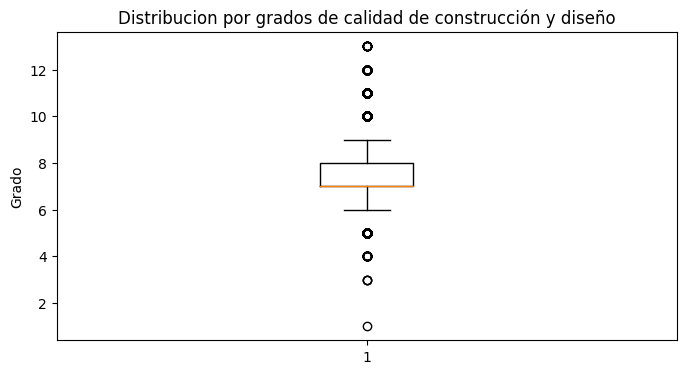

In [ ]:
#Boxplot "grade"

fig, ax = plt.subplots(figsize = (8,4))
ax.boxplot(khouse['grade'].values)
ax.set_title('Distribucion por grados de calidad de construcción y diseño')
ax.set_ylabel('Grado')

###**year_built** : Año de construcción

Text(0, 0.5, 'Cantidad de viviendas')

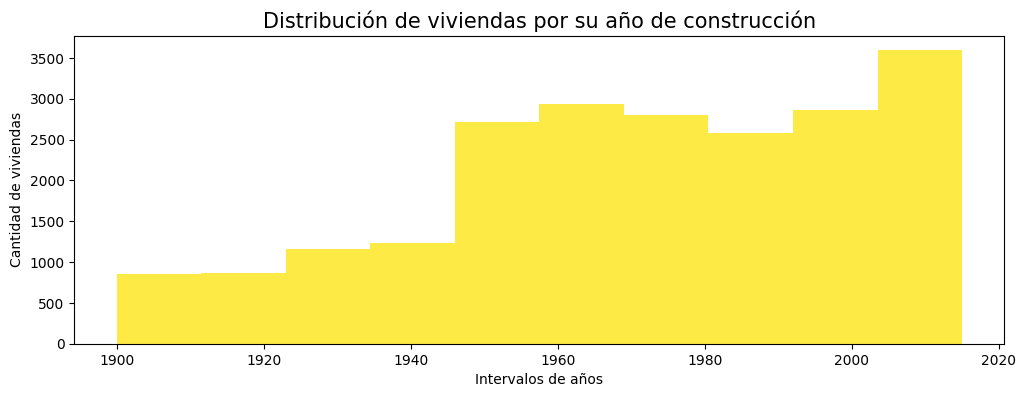

In [ ]:
#Conversión de variable yr_built a enteros para histograma
khouse['yr_built'] = khouse['yr_built'].astype(int)

#Histograma de precio
fig, ax= plt.subplots(figsize=(12,4))
ax.hist(khouse['yr_built'], color = '#fdea45')
ax.set_title('Distribución de viviendas por su año de construcción',fontsize=15)
ax.set_xlabel('Intervalos de años')
ax.set_ylabel('Cantidad de viviendas')

In [ ]:
#Asignación de grupos por precios
grupos_año_c= [1900, 1940, 1980, 2020]
estados_año_c= ['Construida entre 1900 y 1940','Construida entre 1940 y 1980','Construida entre 1980 al 2015']
khouse1['grupos por año construccion'] = pd.cut(khouse1['yr_built'],bins=grupos_año_c,labels=estados_año_c, include_lowest = True, duplicates = 'drop')

#Tabla de frecuencias por grupos de habitaciones
año_cons = pd.DataFrame(khouse1['grupos por año construccion'].value_counts())
año_cons.rename(columns={'count': 'Frecuencia'}, inplace=True)
año_cons['Frecuencia Rel.%'] = (año_cons['Frecuencia']/len(khouse))
año_cons

,Frecuencia,Frecuencia Rel.%
grupos por año construccion,,
Construida entre 1940 y 1980,9244,0.427745
Construida entre 1980 al 2015,9039,0.418259
Construida entre 1900 y 1940,3328,0.153996


Las viviendas por su fecha de construcción, se distribuyen de la siguiente manera:

- 9.244 viviendas (42.7%) se construyeron entre las decadas de los 40's y los 80's
- 9.039 viviendas (41.8%) se construyeron entre la decada de los 80's y el año 2015.
- 3.328 viviendas (15.4%) se encontraban construidas entre el inicio del siglo XX y la decada de los 40's.


### **Otras variables**

####Latitud, Longitud

Teniendo en cuenta la cantidad de tuplas del dataset, a continuación se mostraran los precios de las viviendas junto a sus coordenadas geograficas a través de un mapa interactivo generado con la libreria "folium", para el periodo con mayor numero de ventas registradas: Abril - 2015.

En el mapa de puede visualizar que estas viviendas se encuentran localizadas en la periferia y zona urbana de las ciudad de **Seattle** y **Bellevue**.

In [ ]:
#Filtro de base de datos para registros del Abril del 2015
khouse_filtro = khouse1[khouse1['Month-Year']=='04/15']

#Cargue de libreria "folium" para mapas interactivos
import folium
from folium.plugins import MarkerCluster

#Generación de plot para las coordenadas geograficas por medio de los promedios
mapa = folium.Map(location = [khouse_filtro['lat'].mean(),
                  khouse_filtro['long'].mean()],
                  zoom_start = 10)
#Asignación a variable para crear clusters de ubicaciones
mc = MarkerCluster()

#Localización de pares de coordenadas por clusters
for w in khouse_filtro[['lat','long','price']].itertuples():
  mc.add_child(folium.Marker(location = [w.lat, w.long], popup = w.price))
mapa.add_child(mc)

# Analisis de correlación

A continuación se realizará un breve un analisis de correlación entre las variables del dataset, especialmente con relación a la variable "price" o precio:

In [ ]:
#Matriz de correlación
corr = khouse.corr ()
corr.style.background_gradient (cmap = 'cividis')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.005690,-0.016742,0.001243,0.005237,-0.012166,-0.132110,0.018484,-0.002722,0.011590,-0.023846,0.008165,-0.010830,-0.004983,0.021442,-0.016910,-0.008303,-0.001905,0.020856,-0.002866,-0.138798
date,0.005690,1.000000,-0.004388,-0.016734,-0.034537,-0.034700,0.006305,-0.022434,0.001356,-0.001800,-0.050677,-0.039970,-0.027947,-0.019720,-0.000460,-0.024511,0.001518,-0.032830,-0.007109,-0.031574,0.002555
price,-0.016742,-0.004388,1.000000,0.308366,0.525150,0.702055,0.089661,0.256814,0.266371,0.397299,0.036379,0.667434,0.605567,0.323842,0.054006,0.126436,-0.053182,0.307010,0.021613,0.585377,0.082448
bedrooms,0.001243,-0.016734,0.308366,1.000000,0.515974,0.576763,0.031710,0.175418,-0.006581,0.079537,0.028433,0.356998,0.477616,0.303251,0.154248,0.018844,-0.152717,-0.008950,0.129516,0.391670,0.029252
bathrooms,0.005237,-0.034537,0.525150,0.515974,1.000000,0.754684,0.087730,0.500712,0.063743,0.187735,-0.124917,0.664981,0.685363,0.283737,0.505968,0.050733,-0.203825,0.024619,0.222987,0.568626,0.087163
sqft_living,-0.012166,-0.034700,0.702055,0.576763,0.754684,1.000000,0.172841,0.354048,0.103829,0.284647,-0.058689,0.762727,0.876644,0.434925,0.318066,0.055377,-0.199342,0.052530,0.240187,0.756440,0.183301
sqft_lot,-0.132110,0.006305,0.089661,0.031710,0.087730,0.172841,1.000000,-0.005206,0.021602,0.074705,-0.008951,0.113617,0.183511,0.015301,0.053061,0.007640,-0.129583,-0.085673,0.229519,0.144605,0.718556
floors,0.018484,-0.022434,0.256814,0.175418,0.500712,0.354048,-0.005206,1.000000,0.023695,0.029432,-0.263808,0.458208,0.523899,-0.245634,0.489361,0.006330,-0.059181,0.049628,0.125446,0.279907,-0.011275
waterfront,-0.002722,0.001356,0.266371,-0.006581,0.063743,0.103829,0.021602,0.023695,1.000000,0.401857,0.016655,0.082775,0.072074,0.080618,-0.026172,0.092883,0.030283,-0.014270,-0.041913,0.086463,0.030702
view,0.011590,-0.001800,0.397299,0.079537,0.187735,0.284647,0.074705,0.029432,0.401857,1.000000,0.045995,0.251320,0.167648,0.277051,-0.053474,0.103912,0.084819,0.006172,-0.078408,0.280440,0.072569


Con relación a la variable **"Precio"**, las variables que tienen una correlación positiva significativa con ésta son:

1. El coeficiente de correlación entre la variable "Price" o precios y "bathrooms" o baños es de 0.5251
2. El coeficiente de correlación entre la variable "Price" o precios y "sqft_living" o pies cuadrados habitables es de 0.7020
3. El coeficiente de correlación entre la variable "Price" o precios y "grade" o grado de construcción y diseño es de 0.6674
4. El coeficiente de correlación entre la variable "Price" o precios y "sqft_above" o los pies cuadrados del espacio interior de la vivienda que está sobre el nivel del suelo es de 0.6055
5. El coeficiente de correlación entre la variable "Price" o precios y "sqft_living15" o los pies cuadrados del espacio habitable interior de la vivienda para los 15 vecinos más cercanos es de 0.5853

Ahora con la variable identificada, con la que se tiene un indice de correlación mayor a las demás variables (sqft_living) se realizará un análisis de regresión lineal:

In [ ]:
#Modelo de regresion lineal entre la variable precio y pies cuadrados habitables
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(khouse['price'].values.reshape(-1,1),khouse['sqft_living'])

LinearRegression()

In [ ]:
#Coeficiente
model1.coef_

array([0.00175622])

In [ ]:
#Intercepto
model1.intercept_

1131.3462096241037

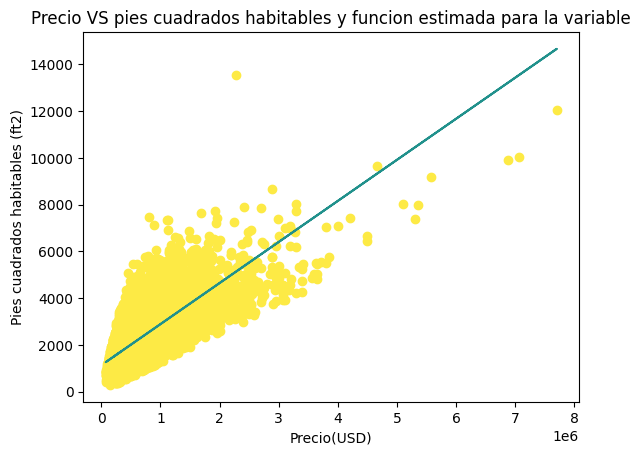

In [ ]:
#Grafica de caracteristica y variable objetivo
plt.scatter(khouse['price'],khouse['sqft_living'], color = '#fdea45')
plt.plot(khouse['price'],model1.predict(khouse['price'].values.reshape(-1,1)), color = '#21918c')
plt.title('Precio VS pies cuadrados habitables y funcion estimada para la variable')
plt.xlabel('Precio(USD)')
plt.ylabel('Pies cuadrados habitables (ft2)')
plt.show()